In [2]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
/mnt/VegaSlowDataDisk/c3po_interface_mark.bak/Materiels/positions/

In [9]:
    #json_file="/mnt/VegaSlowDataDisk/c3po_interface/code/positions/reperes.json"
    json_file="/mnt/VegaSlowDataDisk/c3po_interface_mark.bak/Materiels/positions/3reperes_GMT_positions.json"

    with open(json_file) as json_file:
        data = json.load(json_file)                                                                                                             
        mapdata = (data['map'])
        mapmarkers = (mapdata['markers'])
        shotdata= (data['shot'])
        shotmarkers=(shotdata['markers'])

In [10]:
nombre_points=len(data["shot"]['markers'])
nombre_points
X=[]
Y=[]
Liste=[]

for i in range(nombre_points):
    Liste_partielle=[]
    coord=data["shot"]['markers'][i]["coord"]
    X.append(coord["lat"])
    Y.append(coord["lng"])
    Liste_partielle.append(coord["lat"])
    Liste_partielle.append(coord["lng"])
    Liste.append(Liste_partielle)
    

In [11]:
sommets=np.array([Liste],np.int32)

#im_path="/home/utilisateur/Documents/sureté/cmbce-c3po_interface-60b6d29abdbc/bin/image_inputs/image_2019-04-30_18-17-14.jpg"
im_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_4/image_2019-06-15_08-22-42.jpg"
image=cv2.imread(im_path)

img_gray = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE) 
img_color = cv2.imread(im_path, cv2.IMREAD_COLOR)

img_gray.shape
mask = np.zeros_like(img_gray)
mask = cv2.fillPoly(mask, sommets, color = 1)
mask_inv=-(mask-1)


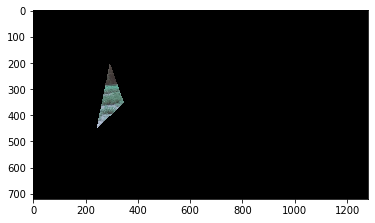

In [12]:
mask_3D=np.zeros((720,1280,3))
mask_3D[:,:,0]=mask
mask_3D[:,:,1]=mask
mask_3D[:,:,2]=mask/mnt/VegaSlowDataDisk/c3po_interface_mark.bak/Materiels/positions/3reperes_GMT_positions.json


mask_3D_inv=np.zeros((720,1280,3))
mask_3D_inv[:,:,0]=mask_inv
mask_3D_inv[:,:,1]=mask_inv
mask_3D_inv[:,:,2]=mask_inv

mask_3D=mask_3D.astype(int)
plt.imshow(np.multiply(img_color,mask_3D))
plt.imshow(img_color*mask_3D)